### Database structure

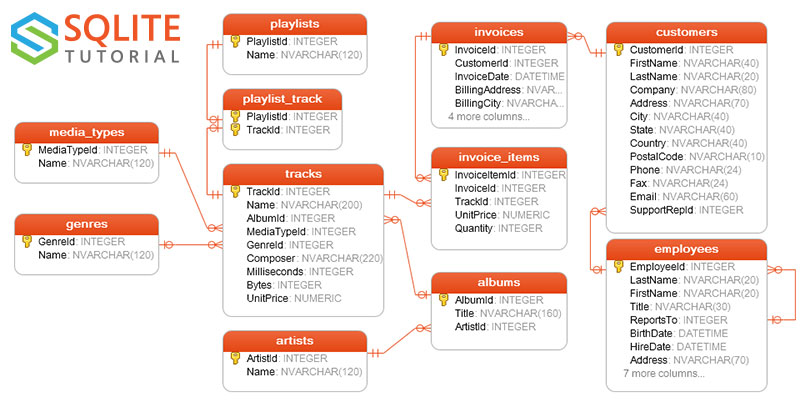

In [1]:
from IPython.display import Image
Image(filename='C:\\Users\\DHRUBAJIT\\Desktop\\sqlite-sample-database-color.jpg')

In [4]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('C:\\Users\\DHRUBAJIT\\Desktop\\chinook.db')
cur = conn.cursor()

In [8]:
# 1. Provide a query showing Customers (just their full names, customer ID and country).
result1 = pd.read_sql_query("SELECT CustomerID, FirstName, LastName, Country from Customers;", conn)
print(result1.head(5))

   CustomerId  FirstName     LastName         Country
0           1       Luís    Gonçalves          Brazil
1           2     Leonie       Köhler         Germany
2           3   François     Tremblay          Canada
3           4      Bjørn       Hansen          Norway
4           5  František  Wichterlová  Czech Republic


In [11]:
# 2. Provide a query only showing the Customers from Brazil.
result2 = pd.read_sql_query("select * from customers where country = 'Brazil';", conn)
print(result2.head(3))

   CustomerId  FirstName   LastName  \
0           1       Luís  Gonçalves   
1          10    Eduardo    Martins   
2          11  Alexandre      Rocha   

                                            Company  \
0  Embraer - Empresa Brasileira de Aeronáutica S.A.   
1                                  Woodstock Discos   
2                              Banco do Brasil S.A.   

                           Address                 City State Country  \
0  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP  Brazil   
1        Rua Dr. Falcão Filho, 155            São Paulo    SP  Brazil   
2               Av. Paulista, 2022            São Paulo    SP  Brazil   

  PostalCode               Phone                 Fax  \
0  12227-000  +55 (12) 3923-5555  +55 (12) 3923-5566   
1  01007-010  +55 (11) 3033-5446  +55 (11) 3033-4564   
2  01310-200  +55 (11) 3055-3278  +55 (11) 3055-8131   

                      Email  SupportRepId  
0      luisg@embraer.com.br             3  
1  eduardo@woods

In [15]:
# 3. Provide a query showing the Invoices of customers who are from Brazil. The resultant table should show the customer's full 
# name, Invoice ID, Date of the invoice and billing country.
result3 = pd.read_sql_query("select c.firstname, c.lastname, i.invoiceid, i.invoicedate, i.billingcountry \
                             from customers as c, invoices as i \
                             where c.customerid = i.customerid and c.country='Brazil' ;", conn)
print(result3.head(10))

  FirstName   LastName  InvoiceId          InvoiceDate BillingCountry
0      Luís  Gonçalves         98  2010-03-11 00:00:00         Brazil
1      Luís  Gonçalves        121  2010-06-13 00:00:00         Brazil
2      Luís  Gonçalves        143  2010-09-15 00:00:00         Brazil
3      Luís  Gonçalves        195  2011-05-06 00:00:00         Brazil
4      Luís  Gonçalves        316  2012-10-27 00:00:00         Brazil
5      Luís  Gonçalves        327  2012-12-07 00:00:00         Brazil
6      Luís  Gonçalves        382  2013-08-07 00:00:00         Brazil
7   Eduardo    Martins         25  2009-04-09 00:00:00         Brazil
8   Eduardo    Martins        154  2010-11-14 00:00:00         Brazil
9   Eduardo    Martins        177  2011-02-16 00:00:00         Brazil


In [16]:
# 4. Provide a query showing only the Employees who are Sales department.
result4 = pd.read_sql_query("select * from employees where title LIKE 'Sales%';", conn)
print(result4)

   EmployeeId LastName FirstName                Title  ReportsTo  \
0           2  Edwards     Nancy        Sales Manager          1   
1           3  Peacock      Jane  Sales Support Agent          2   
2           4     Park  Margaret  Sales Support Agent          2   
3           5  Johnson     Steve  Sales Support Agent          2   

             BirthDate             HireDate           Address     City State  \
0  1958-12-08 00:00:00  2002-05-01 00:00:00      825 8 Ave SW  Calgary    AB   
1  1973-08-29 00:00:00  2002-04-01 00:00:00     1111 6 Ave SW  Calgary    AB   
2  1947-09-19 00:00:00  2003-05-03 00:00:00  683 10 Street SW  Calgary    AB   
3  1965-03-03 00:00:00  2003-10-17 00:00:00      7727B 41 Ave  Calgary    AB   

  Country PostalCode              Phone                Fax  \
0  Canada    T2P 2T3  +1 (403) 262-3443  +1 (403) 262-3322   
1  Canada    T2P 5M5  +1 (403) 262-3443  +1 (403) 262-6712   
2  Canada    T2P 5G3  +1 (403) 263-4423  +1 (403) 263-4289   
3  Canada 

In [17]:
# 5. Provide a query showing a unique list of billing countries from the Invoice table.
result5 = pd.read_sql_query("select distinct billingcountry from invoices;", conn)
print(result5)

    BillingCountry
0          Germany
1           Norway
2          Belgium
3           Canada
4              USA
5           France
6          Ireland
7   United Kingdom
8        Australia
9            Chile
10           India
11          Brazil
12        Portugal
13     Netherlands
14           Spain
15          Sweden
16  Czech Republic
17         Finland
18         Denmark
19           Italy
20          Poland
21         Austria
22         Hungary
23       Argentina


In [21]:
# 6. Provide a query showing the invoices of customers who are from Brazil.
result6 = pd.read_sql_query("select * from customers as c, invoices as i where c.country = 'Brazil' \
                            and c.customerid = i.customerid;", conn)
print(result6.head(2))

   CustomerId FirstName   LastName  \
0           1      Luís  Gonçalves   
1           1      Luís  Gonçalves   

                                            Company  \
0  Embraer - Empresa Brasileira de Aeronáutica S.A.   
1  Embraer - Empresa Brasileira de Aeronáutica S.A.   

                           Address                 City State Country  \
0  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP  Brazil   
1  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP  Brazil   

  PostalCode               Phone  ...  SupportRepId InvoiceId  CustomerId  \
0  12227-000  +55 (12) 3923-5555  ...             3        98           1   
1  12227-000  +55 (12) 3923-5555  ...             3       121           1   

           InvoiceDate                   BillingAddress          BillingCity  \
0  2010-03-11 00:00:00  Av. Brigadeiro Faria Lima, 2170  São José dos Campos   
1  2010-06-13 00:00:00  Av. Brigadeiro Faria Lima, 2170  São José dos Campos   

  BillingState BillingCoun

In [24]:
# 7. Provide a query that shows the invoices associated with each sales agent. The resultant table should include the Sales 
# Agent's full name.
result7 = pd.read_sql_query("select e.firstname, e.lastname, i.* from customers as c, invoices as i \
                            on c.customerid = i.customerid\
                            join employees as e on e.employeeid = c.supportrepid ;", conn)
print(result7.head(4))

  FirstName LastName  InvoiceId  CustomerId          InvoiceDate  \
0      Jane  Peacock         98           1  2010-03-11 00:00:00   
1      Jane  Peacock        121           1  2010-06-13 00:00:00   
2      Jane  Peacock        143           1  2010-09-15 00:00:00   
3      Jane  Peacock        195           1  2011-05-06 00:00:00   

                    BillingAddress          BillingCity BillingState  \
0  Av. Brigadeiro Faria Lima, 2170  São José dos Campos           SP   
1  Av. Brigadeiro Faria Lima, 2170  São José dos Campos           SP   
2  Av. Brigadeiro Faria Lima, 2170  São José dos Campos           SP   
3  Av. Brigadeiro Faria Lima, 2170  São José dos Campos           SP   

  BillingCountry BillingPostalCode  Total  
0         Brazil         12227-000   3.98  
1         Brazil         12227-000   3.96  
2         Brazil         12227-000   5.94  
3         Brazil         12227-000   0.99  


In [31]:
# 8. Provide a query that shows the Invoice Total, Customer name, Country and Sale Agent name for all invoices and customers.
result8 = pd.read_sql_query("select c.firstname as 'customer name', c.country, e.firstname as 'employee name', i.total \
                             from customers as c, invoices as i \
                             on c.customerid = i.customerid\
                             join employees as e on e.employeeid = c.supportrepid;", conn)
print(result8.head(5))

  customer name Country employee name  Total
0          Luís  Brazil          Jane   3.98
1          Luís  Brazil          Jane   3.96
2          Luís  Brazil          Jane   5.94
3          Luís  Brazil          Jane   0.99
4          Luís  Brazil          Jane   1.98


In [44]:
# 9. How many Invoices were there in 2009 and 2011? What was the respective total sales for each of those years?
result9a = pd.read_sql_query("select count(i.invoiceid) as 'count', sum(i.total) as 'total' from invoices as i \
                            where i.invoicedate between '2009-01-01 00:00:00' and '2009-12-31 11:59:59';", conn)
print("Total count in 2009: %d; total sales: %.2f" %(result9a['count'], result9a['total']))

result9b = pd.read_sql_query("select count(i.invoiceid) as 'count', sum(i.total) as 'total' from invoices as i \
                            where i.invoicedate between '2011-01-01 00:00:00' and '2011-12-31 11:59:59';", conn)
print("Total count in 2011: %d; total sales: %.2f" %(result9b['count'], result9b['total']))

Total count in 2009: 83; total sales: 449.46
Total count in 2011: 83; total sales: 469.58


In [46]:
# 10. Looking at the Invoice_items table, provide a query that COUNTs the number of line items for Invoice ID 37.
result10 = pd.read_sql_query("select count(it.invoicelineid) as 'count' from invoice_items as it where it.invoiceid = 37;", conn)
print(result10.head(5))

   count
0      4


In [48]:
# 11. Looking at the InvoiceLine table, provide a query that COUNTs the number of line items for each Invoice. HINT: GROUP BY
results11 = pd.read_sql_query("select it.invoiceid, count(it.invoicelineid) as 'count' from invoice_items as it \
                               group by it.invoiceid;", conn)
print(results11)

     InvoiceId  count
0            1      2
1            2      4
2            3      6
3            4      9
4            5     14
5            6      1
6            7      2
7            8      2
8            9      4
9           10      6
10          11      9
11          12     14
12          13      1
13          14      2
14          15      2
15          16      4
16          17      6
17          18      9
18          19     14
19          20      1
20          21      2
21          22      2
22          23      4
23          24      6
24          25      9
25          26     14
26          27      1
27          28      2
28          29      2
29          30      4
..         ...    ...
382        383     14
383        384      1
384        385      2
385        386      2
386        387      4
387        388      6
388        389      9
389        390     14
390        391      1
391        392      2
392        393      2
393        394      4
394        395      6
395       

In [50]:
# 12. Provide a query that includes the track name with each invoice line item.
results12 = pd.read_sql_query("select t.name from tracks as t, invoice_items as i where t.trackid = i.trackid ;", conn)
print(results12.head(5))

                                      Name
0  For Those About To Rock (We Salute You)
1                        Balls to the Wall
2                        Balls to the Wall
3                          Fast As a Shark
4                        Restless and Wild


In [56]:
# 13. Provide a query that includes the purchased track name AND artist name with each invoice line item.
results13 = pd.read_sql_query("select i.invoiceid, t.name as 'track-name', ar.name as 'artist-name' from invoice_items as i \
                         join tracks as t on t.trackid = i.trackid \
                         join albums as al on al.albumid = t.albumid \
                         join artists as ar on ar.artistid = al.artistid;", conn)
print(results13)

      InvoiceId                                         track-name  \
0             1                                  Balls to the Wall   
1             1                                  Restless and Wild   
2             2                              Put The Finger On You   
3             2                                   Inject The Venom   
4             2                                         Evil Walks   
5             2                                 Breaking The Rules   
6             3                                        Dog Eat Dog   
7             3                                           Overdose   
8             3                                Love In An Elevator   
9             3                                  Janie's Got A Gun   
10            3                                    Deuces Are Wild   
11            3                                              Angel   
12            4                                  Right Through You   
13            4     

In [58]:
# 14. Provide a query that shows the # of invoices per country. HINT: GROUP BY
result14 = pd.read_sql_query("select i.billingcountry,count(i.invoiceid) as '#count' from invoices as i group by i.billingcountry;",conn)
print(result14)

    BillingCountry  #count
0        Argentina       7
1        Australia       7
2          Austria       7
3          Belgium       7
4           Brazil      35
5           Canada      56
6            Chile       7
7   Czech Republic      14
8          Denmark       7
9          Finland       7
10          France      35
11         Germany      28
12         Hungary       7
13           India      13
14         Ireland       7
15           Italy       7
16     Netherlands       7
17          Norway       7
18          Poland       7
19        Portugal      14
20           Spain       7
21          Sweden       7
22             USA      91
23  United Kingdom      21


In [64]:
# 15. Provide a query that shows the total number of tracks in each playlist. The Playlist name should be include on the 
# resultant table.
result15 = pd.read_sql_query("select p.name,count(pt.trackid) as '# tracks' from playlist_track as pt, playlists as p on \
                              p.playlistid = pt.playlistid group by p.playlistid;", conn)
print(result15)

                          Name  # tracks
0                        Music      3290
1                     TV Shows       213
2                   90’s Music      1477
3                        Music      3290
4                 Music Videos         1
5                     TV Shows       213
6              Brazilian Music        39
7                    Classical        75
8    Classical 101 - Deep Cuts        25
9   Classical 101 - Next Steps        25
10  Classical 101 - The Basics        25
11                      Grunge        15
12         Heavy Metal Classic        26
13                 On-The-Go 1         1


In [70]:
# 16. Provide a query that shows all the Tracks, but displays no IDs. The resultant table should include the Album name, 
# Media type and Genre.
result16 = pd.read_sql_query("select t.name as 'track_name', al.title as 'album_name', mt.name as 'media_type', g.name as 'genre' \
                              from tracks as t \
                              join albums as al on al.albumid = t.albumid \
                              join genres as g on g.genreid = t.genreid \
                              join media_types as mt on mt.mediatypeid = t.mediatypeid;", conn)
print(result16.head(2))

                                track_name  \
0  For Those About To Rock (We Salute You)   
1                        Balls to the Wall   

                              album_name                media_type genre  
0  For Those About To Rock We Salute You           MPEG audio file  Rock  
1                      Balls to the Wall  Protected AAC audio file  Rock  


In [73]:
# 17. Provide a query that shows all Invoices but includes the # of invoice line items.
result17 = pd.read_sql_query("select i.invoiceid, count(it.invoicelineid) as 'count' from invoices as i, \
                              invoice_items as it on i.invoiceid = it.invoiceid group by i.invoiceid;", conn)
print(result17)

     InvoiceId  count
0            1      2
1            2      4
2            3      6
3            4      9
4            5     14
5            6      1
6            7      2
7            8      2
8            9      4
9           10      6
10          11      9
11          12     14
12          13      1
13          14      2
14          15      2
15          16      4
16          17      6
17          18      9
18          19     14
19          20      1
20          21      2
21          22      2
22          23      4
23          24      6
24          25      9
25          26     14
26          27      1
27          28      2
28          29      2
29          30      4
..         ...    ...
382        383     14
383        384      1
384        385      2
385        386      2
386        387      4
387        388      6
388        389      9
389        390     14
390        391      1
391        392      2
392        393      2
393        394      4
394        395      6
395       

In [78]:
# 18. Provide a query that shows total sales made by each sales agent.
result18 = pd.read_sql_query("select e.firstname, count(i.invoiceid) as '#count', sum(i.total) as 'total_sales' from employees as e \
                              join customers as c on c.supportrepid = e.employeeid \
                              join invoices as i on i.customerid = c.customerid \
                              group by e.firstname;", conn)
print(result18)

  FirstName  #count  total_sales
0      Jane     146       833.04
1  Margaret     140       775.40
2     Steve     126       720.16


In [82]:
# 19. Which sales agent made the most in sales in 2009?
result19 = pd.read_sql_query("select *, min(total_sales) from \
                              (select e.firstname, count(i.invoiceid) as '#count', sum(i.total) as 'total_sales' from employees as e \
                              join customers as c on c.supportrepid = e.employeeid \
                              join invoices as i on i.customerid = c.customerid \
                              where i.invoicedate between '2009-01-01 00:00:00' and '2009-12-31 11:59:59' \
                              group by e.firstname);", conn)
print(result19)

  firstname  #count  total_sales  min(total_sales)
0      Jane      25       123.75            123.75


In [84]:
# 20. Provide a query that shows the # of customers assigned to each sales agent.
result20 = pd.read_sql_query("select e.firstname, count(c.customerid) as 'total_customers' from employees as e, \
                              customers as c where c.supportrepid = e.employeeid group by e.employeeid;", conn)
print(result20)

  FirstName  total_customers
0      Jane               21
1  Margaret               20
2     Steve               18


In [91]:
# 21. Provide a query that shows the total sales per country. Which country's customers spent the most?
result21 = pd.read_sql_query("select c.country, sum(i.total) as 'total_sales' from customers as c, invoices as i \
                              where c.customerid = i.customerid group by c.country order by total_sales DESC;", conn)
print(result21)

           Country  total_sales
0              USA       523.06
1           Canada       303.96
2           France       195.10
3           Brazil       190.10
4          Germany       156.48
5   United Kingdom       112.86
6   Czech Republic        90.24
7         Portugal        77.24
8            India        75.26
9            Chile        46.62
10         Hungary        45.62
11         Ireland        45.62
12         Austria        42.62
13         Finland        41.62
14     Netherlands        40.62
15          Norway        39.62
16          Sweden        38.62
17       Argentina        37.62
18       Australia        37.62
19         Denmark        37.62
20           Italy        37.62
21          Poland        37.62
22         Belgium        37.62
23           Spain        37.62


In [97]:
# 22. Provide a query that shows the most purchased track of 2013.
result22 = pd.read_sql_query("select t.name, count(it.trackid) as 'count' from tracks as t, invoice_items as it \
                              on t.trackid = it.trackid \
                              join invoices as i on i.invoiceid = it.invoiceid \
                              where i.invoicedate between '2013-01-01 00:00:00' and '2013-12-31 11:59:59' \
                              group by t.name order by count desc ;", conn)
print(result22)

                                  Name  count
0                             Eruption      2
1                       Paint It Black      2
2                              Release      2
3                            Sanctuary      2
4                    Sign Of The Cross      2
5           Since I've Been Loving You      2
6                       Sweetest Thing      2
7                          The Trooper      2
8                    Where Eagles Dare      2
9                      'Round Midnight      1
10                   04 - Running Free      1
11                            1/2 Full      1
12                            14 Years      1
13               2 Minutes To Midnight      1
14                   A Bencao E Outros      1
15                    A Moça e a Chuva      1
16                   A Novidade (Live)      1
17                               A Paz      1
18                               A Sua      1
19            Abraham, Martin And John      1
20                            Acel